In [1]:

import numpy as np 
import pandas as pd 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r"C:\Users\Sneha\Downloads\archive (12)\train.csv", sep = ',')
df_test = pd.read_csv(r"C:\Users\Sneha\Downloads\archive (12)\test.csv", sep = ',')

In [4]:
df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [5]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [7]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [8]:
(df.isnull().sum()/len(df))

beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.172123
lot_size_units    0.172123
zip_code          0.000000
price             0.000000
dtype: float64

In [9]:
df = df.dropna()

In [10]:
(df.isnull().sum()/len(df))

beds              0.0
baths             0.0
size              0.0
size_units        0.0
lot_size          0.0
lot_size_units    0.0
zip_code          0.0
price             0.0
dtype: float64

In [11]:
df = df.drop('size_units', axis = 1)

<AxesSubplot:>

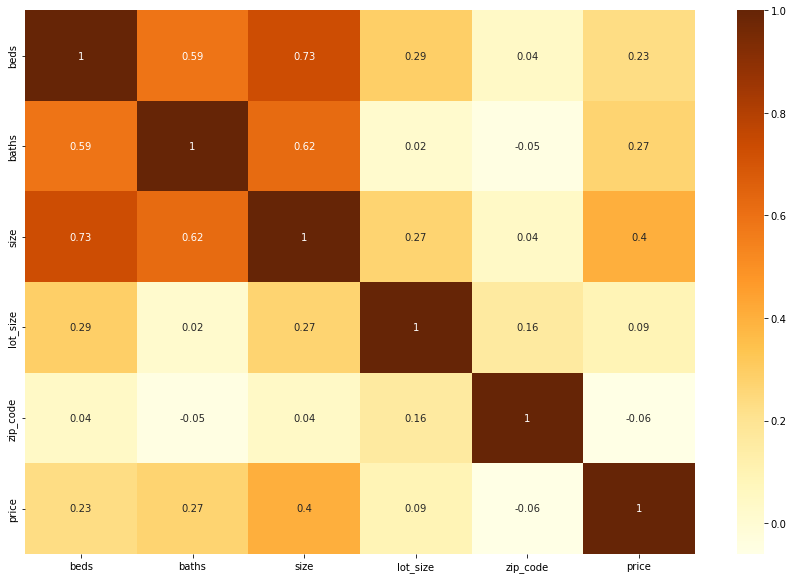

In [12]:
correl = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

<AxesSubplot:xlabel='price', ylabel='Count'>

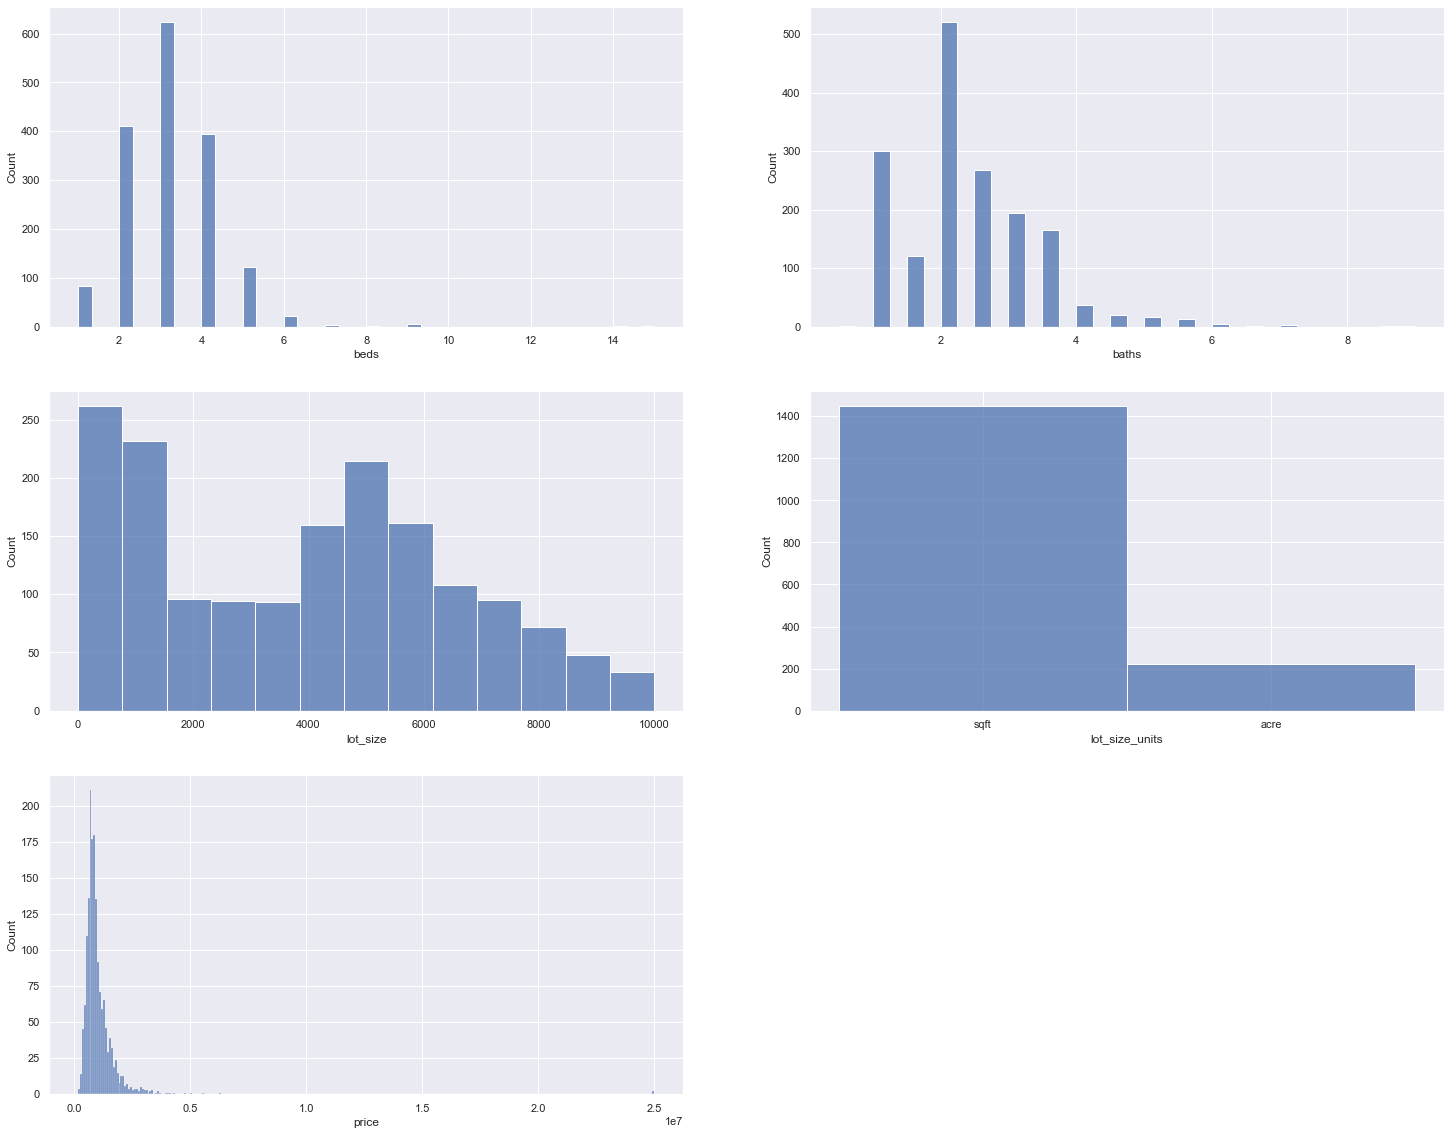

In [13]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(df['beds'], kde = False)

plt.subplot(3,2,2)
sns.histplot(df['baths'], kde = False)

plt.subplot(3,2,3)
sns.histplot(df['lot_size'], kde = False)

plt.subplot(3,2,4)
sns.histplot(df['lot_size_units'], kde = False)

plt.subplot(3,2,5)
sns.histplot(df['price'], kde = False)

<AxesSubplot:title={'center':'Boxplot Beds'}, xlabel='beds'>

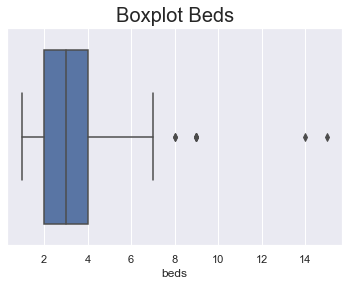

In [14]:
plt.title("Boxplot Beds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["beds"])

In [15]:
df = df[df['beds'] < 10]

<AxesSubplot:title={'center':'Boxplot Beds Without Outliers'}, xlabel='beds'>

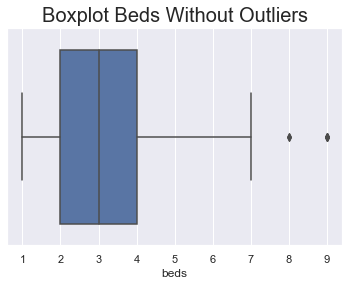

In [16]:
plt.title("Boxplot Beds Without Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=df["beds"])

<AxesSubplot:title={'center':'Boxplot Baths'}, xlabel='baths'>

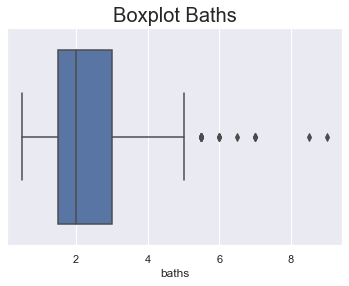

In [17]:
plt.title("Boxplot Baths", fontdict = {'fontsize': 20})
sns.boxplot(x=df["baths"])

<AxesSubplot:title={'center':'Boxplot Price'}, xlabel='price'>

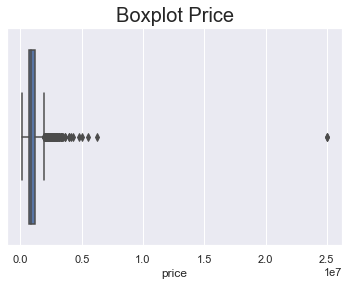

In [18]:
plt.title("Boxplot Price", fontdict = {'fontsize': 20})
sns.boxplot(x=df["price"])

In [19]:
df = df[df['price'] < 5000000]

<AxesSubplot:title={'center':'Boxplot Price After Outlier'}, xlabel='price'>

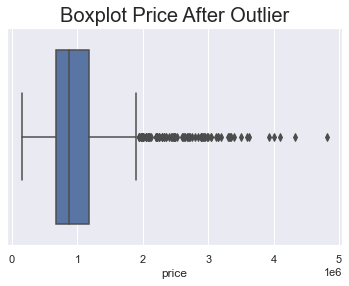

In [20]:
plt.title("Boxplot Price After Outlier", fontdict = {'fontsize': 20})
sns.boxplot(x=df["price"])

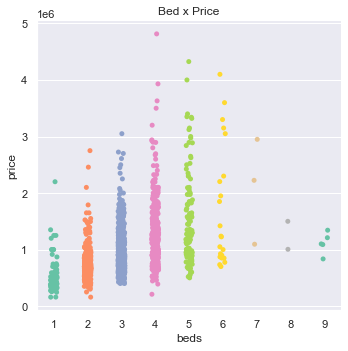

In [21]:
sns.catplot(x = "beds", y = "price", palette = "Set2", data = df).set(title='Bed x Price')

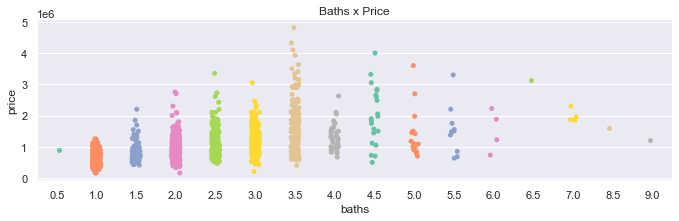

In [22]:
sns.catplot(x = "baths", y = "price", palette = "Set2", data = df, height=3.2, aspect=3).set(title='Baths x Price')

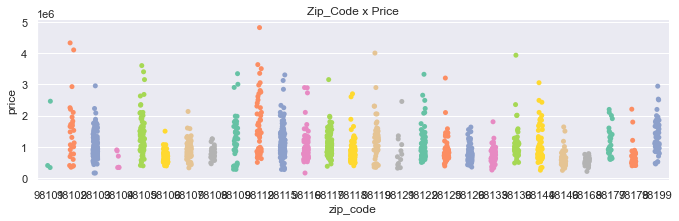

In [23]:
sns.catplot(x = "zip_code", y = "price", palette = "Set2", data = df, height=3.2, aspect=3).set(title='Zip_Code x Price')

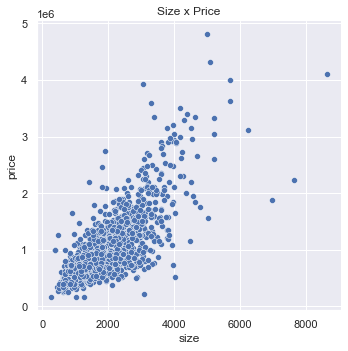

In [24]:
sns.relplot(x='size', y = 'price' , data = df).set(title='Size x Price')

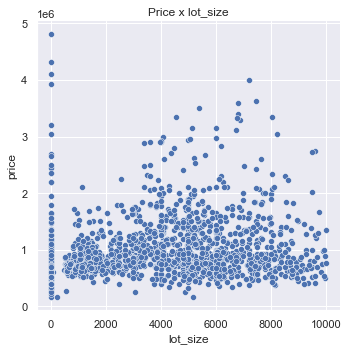

In [25]:
sns.relplot(x='lot_size', y = 'price' , data = df).set(title='Price x lot_size')

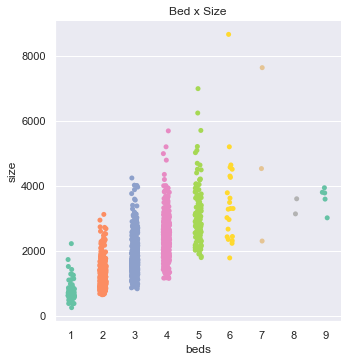

In [26]:
sns.catplot(x = "beds", y = "size", palette = "Set2", data = df).set(title='Bed x Size')

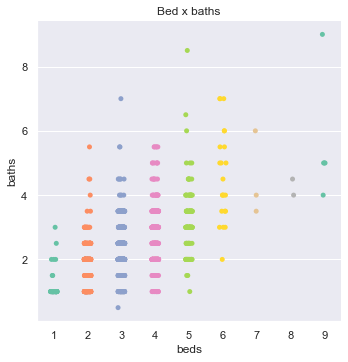

In [27]:
sns.catplot(x = "beds", y = "baths", palette = "Set2", data = df).set(title='Bed x baths')

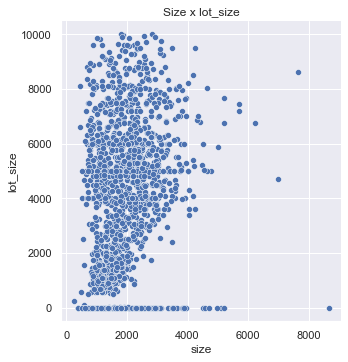

In [28]:
sns.relplot(x='size', y = 'lot_size' , data = df).set(title='Size x lot_size')

In [29]:
X = df.drop('price', axis = 1)

In [30]:
X = X.values

In [31]:
y = df['price']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder_lot_size_units = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

In [34]:
X[:,4] = label_encoder_lot_size_units.fit_transform(X[:,4])
X[:,5] = label_encoder_zip_code.fit_transform(X[:,5])

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
y_standard = scaler.fit_transform(y.values.reshape(-1,1))

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 0)

In [38]:
X_train.shape, y_train.shape

((1163, 6), (1163, 1))

In [39]:
X_test.shape, y_test.shape

((499, 6), (499, 1))

In [40]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [41]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [42]:
lr_normal_score_train = lr_model.score(X_train, y_train)

In [43]:
lr_normal_score_train

0.6003350048655648

In [44]:
lr_normal_score_test = lr_model.score(X_test, y_test)

In [45]:
lr_normal_score_test

0.6431858188414716

In [46]:
previsoes = lr_model.predict(X_test)

In [47]:
mae_lr_normal = mean_absolute_error(y_test, previsoes)

In [48]:
mae_lr_normal

0.4020685550560499

In [49]:
rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))

In [50]:
rmse_lr_normal

0.608361812456157

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [53]:
model = DecisionTreeRegressor()

In [54]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)

In [55]:
gridDecisionTree.fit(X_train, y_train)

C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 178, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [56]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  5
Algorithm:  absolute_error
Score:  0.5289146436025218


In [57]:
decision_tree = DecisionTreeRegressor(min_samples_split = 2, max_depth =5, criterion = 'absolute_error')

In [58]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [59]:
lr_normal_decision_tree = decision_tree.score(X_train, y_train)

In [60]:
lr_normal_decision_tree

0.6773980013063587

In [61]:
lr_normal_decision_tree_test = decision_tree.score(X_test, y_test)

In [62]:
lr_normal_decision_tree_test

0.6252883155221488

In [63]:
previsoes = decision_tree.predict(X_test)

In [64]:
mae_lr_normal_decision_tree  = mean_absolute_error(y_test, previsoes)

In [65]:
mae_lr_normal_decision_tree

0.3964719053101687

In [66]:
rmse_lr_normal_decision_tree = np.sqrt(mean_squared_error(y_test, previsoes))

In [67]:
rmse_lr_normal_decision_tree

0.6234326019869076

In [68]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

In [69]:
regressor_rf.fit(X_train, y_train)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_27112\154324081.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rf.fit(X_train, y_train)


RandomForestRegressor()

In [70]:
lr_normal_rf = regressor_rf.score(X_train, y_train)

In [71]:
lr_normal_rf

0.95352753535878

In [72]:
lr_normal_rf_test = regressor_rf.score(X_test, y_test)

In [73]:
lr_normal_rf_test

0.7258117204731763

In [74]:
previsoes = regressor_rf.predict(X_test)

In [75]:
mae_lr_normal_rf  = mean_absolute_error(y_test, previsoes)

In [76]:
mae_lr_normal_rf

0.3435331392354566

In [77]:
rmse_lr_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))

In [78]:
rmse_lr_normal_rf

0.533292326917446

In [79]:
columns = df.drop('price', axis = 1).columns

In [80]:
feature_imp_random = pd.Series(regressor_rf.feature_importances_, index = columns).sort_values(ascending = False)

In [81]:
feature_imp_random

size              0.693222
zip_code          0.108195
lot_size          0.099993
baths             0.061184
beds              0.033152
lot_size_units    0.004253
dtype: float64

In [82]:
from sklearn.ensemble import AdaBoostRegressor

In [83]:
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 0.01, 0.2, 0.3, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [84]:
model = AdaBoostRegressor()

In [85]:
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = 1)

In [86]:
gridAdaBoost.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': array([1.  , 1.1 , 0.01, 0.2 , 0.3 , 0.4 ]),
                         'n_estimators': array([500])})

In [87]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.01
Score:  0.5396850597214775


In [88]:
ada_boost = AdaBoostRegressor(learning_rate = 0.01, n_estimators = 500)

In [89]:
ada_boost.fit(X_train, y_train.ravel())

AdaBoostRegressor(learning_rate=0.01, n_estimators=500)

In [90]:
lr_normal_ada_boost = ada_boost.score(X_train, y_train)

In [91]:
lr_normal_ada_boost

0.6457373004939028

In [92]:
lr_normal_ada_boost_test = ada_boost.score(X_test, y_test)

In [93]:
lr_normal_ada_boost_test

0.6193356509030934

In [94]:
previsoes = ada_boost.predict(X_test)

In [95]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

In [96]:
mae_lr_normal_ada_boost  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [97]:
mae_lr_normal_ada_boost

235777.59803474732

In [98]:
rmse_ada_boost = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [99]:
rmse_ada_boost

335546.7865186919

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 1.5, 1.7, 0.5, 0.4])
criterion = np.array(['friedman_mse', 'squared_error'])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'criterion': criterion}

In [102]:
model = GradientBoostingRegressor()

In [103]:
gridGradientBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = 1)

In [104]:
gridGradientBoost.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': array(['friedman_mse', 'squared_error'], dtype='<U13'),
                         'learning_rate': array([1. , 1.1, 1.5, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

In [105]:
print('Learning Rate: ', gridGradientBoost.best_estimator_.learning_rate)
print('Criterion: ', gridGradientBoost.best_estimator_.criterion)
print('Score: ', gridGradientBoost.best_score_)

Learning Rate:  0.4
Criterion:  friedman_mse
Score:  0.568732420258222


In [106]:
grad_boost = GradientBoostingRegressor(learning_rate = 0.4, n_estimators = 500, criterion = 'friedman_mse')

In [107]:
grad_boost.fit(X_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.4, n_estimators=500)

In [108]:
lr_normal_grad_boost = grad_boost.score(X_train, y_train)

In [109]:
lr_normal_grad_boost

0.9948582838269058

In [110]:
lr_normal_grad_boost_test = grad_boost.score(X_test, y_test)

In [111]:
lr_normal_grad_boost_test

0.6792364460481242

In [112]:
previsoes = grad_boost.predict(X_test)

In [113]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

In [114]:
mae_lr_normal_grad_boost  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [115]:
mae_lr_normal_grad_boost

194828.84367698684

In [116]:
rmse_grad_boost = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [117]:
rmse_grad_boost

308016.86037725833

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

In [119]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
lot_size,1411806.33
size,525479.46
zip_code,2853.45
baths,419.19
beds,387.12
lot_size_units,120.90


In [120]:
feature_imp_random

size              0.693222
zip_code          0.108195
lot_size          0.099993
baths             0.061184
beds              0.033152
lot_size_units    0.004253
dtype: float64

#### Modelling Results

In [122]:
linear_regression = {'Model':'Linear Regression',
               'Score Train':lr_normal_score_train,
               'Score Test':lr_normal_score_test,
               'MSE':mae_lr_normal,
               'RMSE':rmse_lr_normal,}


decision_tree = {'Model':'Decision Tree',
               'Score Train':lr_normal_decision_tree,
               'Score Test':lr_normal_decision_tree_test,
               'MSE':mae_lr_normal_decision_tree,
               'RMSE':rmse_lr_normal_decision_tree,}

random_forest = {'Model':'Random Forest',
               'Score Train':lr_normal_rf,
               'Score Test':lr_normal_rf_test,
               'MSE':mae_lr_normal_rf,
               'RMSE':rmse_lr_normal_rf,}

ada = {'Model':'Ada Boost',
               'Score Train':lr_normal_ada_boost,
               'Score Test':lr_normal_ada_boost_test,
               'MSE':mae_lr_normal_ada_boost,
               'RMSE':rmse_ada_boost,}

grad = {'Model':'Gradient Boosting',
               'Score Train':lr_normal_grad_boost,
               'Score Test':lr_normal_grad_boost_test,
               'MSE':mae_lr_normal_grad_boost,
               'RMSE':rmse_grad_boost,}

In [123]:
resume = pd.DataFrame({'Linear Regression':pd.Series(linear_regression),
                      
                       'Decision Tree':pd.Series(decision_tree),
                       'Random Forest':pd.Series(random_forest),
                       
                       'AdaBoost':pd.Series(ada),
                       'GradientBoosting':pd.Series(grad),
                      })

In [124]:
resume

,Linear Regression,Decision Tree,Random Forest,AdaBoost,GradientBoosting
Model,Linear Regression,Decision Tree,Random Forest,Ada Boost,Gradient Boosting
Score Train,0.600335,0.677398,0.953528,0.645737,0.994858
Score Test,0.643186,0.625288,0.725812,0.619336,0.679236
MSE,0.402069,0.396472,0.343533,235777.598035,194828.843677
RMSE,0.608362,0.623433,0.533292,335546.786519,308016.860377
